In [1]:
# Imports
# ---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib as mpl

register_matplotlib_converters()

# File locations
# ---------------
the_gases = './oxaria/data/raw/1oxaria/json/gap_filling/batch_2_feb21_may21/'
pngs = './oxaria/data/pngs/'

In [2]:
# Load the df
# -------------
oxaria1_gases = pd.read_feather(
    the_gases+'oxaria1_gases_q12021_gf.ftr').set_index(['tag', 'rec'])

In [3]:
oxaria1_gases.head()

val.no2.wev  val.no2.cnc  val.no2.aev  \
tag         rec                                                                
scs-bgx-536 2021-01-01 00:00:04+00:00      0.28538 -1202.800049      0.16269   
            2021-01-01 00:00:14+00:00      0.28538 -1200.099976      0.16225   
            2021-01-01 00:00:24+00:00      0.28532 -1197.300049      0.16175   
            2021-01-01 00:00:34+00:00      0.28500 -1200.000000      0.16194   
            2021-01-01 00:00:44+00:00      0.28475 -1207.099976      0.16288   

                                       val.no2.wec  val.ox.wev   val.ox.cnc  \
tag         rec                                                               
scs-bgx-536 2021-01-01 00:00:04+00:00      0.13644     0.41407  1256.000000   
            2021-01-01 00:00:14+00:00      0.13699     0.41388  1252.500000   
            2021-01-01 00:00:24+00:00      0.13754     0.41338  1248.300049   
            2021-01-01 00:00:34+00:00      0.13700     0.41276  1248.599976   
            2021-01-01 00:00:44+00:00      0.13559     0.41269  1255.699951   

                                       val.ox.aev  val.ox.wec  val.no.wev  \
tag         rec                                                             
scs-bgx-536 2021-01-01 00:00:04+00:00     0.39182     0.36779     0.28457   
            2021-01-01 00:00:14+00:00     0.39176     0.36675     0.28413   
            2021-01-01 00:00:24+00:00     0.39188     0.36549     0.28400   
            2021-01-01 00:00:34+00:00     0.39176     0.36559     0.28425   
            2021-01-01 00:00:44+00:00     0.39182     0.36770     0.28444   

                                       val.no.cnc  ...  val.no.wec  \
tag         rec                                    ...               
scs-bgx-536 2021-01-01 00:00:04+00:00 -217.300003  ...     0.01909   
            2021-01-01 00:00:14+00:00 -218.399994  ...     0.01865   
            2021-01-01 00:00:24+00:00 -218.699997  ...     0.01852   
            2021-01-01 00:00:34+00:00 -218.100006  ...     0.01877   
            2021-01-01 00:00:44+00:00 -217.899994  ...     0.01883   

                                       val.co.wev  val.co.cnc  val.co.aev  \
tag         rec                                                             
scs-bgx-536 2021-01-01 00:00:04+00:00     0.33244  171.699997     0.26963   
            2021-01-01 00:00:14+00:00     0.33288  173.000000     0.26969   
            2021-01-01 00:00:24+00:00     0.33332  175.500000     0.26932   
            2021-01-01 00:00:34+00:00     0.33351  175.800003     0.26944   
            2021-01-01 00:00:44+00:00     0.33344  175.800003     0.26938   

                                       val.co.wec  val.sht.hmd  val.sht.tmp  \
tag         rec                                                               
scs-bgx-536 2021-01-01 00:00:04+00:00     0.04041    78.500000          1.0   
            2021-01-01 00:00:14+00:00     0.04079    78.400002          1.0   
            2021-01-01 00:00:24+00:00     0.04156    78.300003          1.0   
            2021-01-01 00:00:34+00:00     0.04164    78.000000          1.0   
            2021-01-01 00:00:44+00:00     0.04163    77.800003          1.0   

                                       exg.vb20.no2.cnc          insert_date  \
tag         rec                                                                
scs-bgx-536 2021-01-01 00:00:04+00:00               NaN  05/07/2021 19:00:09   
            2021-01-01 00:00:14+00:00               NaN  05/07/2021 19:00:09   
            2021-01-01 00:00:24+00:00               NaN  05/07/2021 19:00:09   
            2021-01-01 00:00:34+00:00               NaN  05/07/2021 19:00:09   
            2021-01-01 00:00:44+00:00               NaN  05/07/2021 19:00:09   

                                          name  
tag         rec                                 
scs-bgx-536 2021-01-01 00:00:04+00:00  High St  
            2021-01-01 00:00:14+00:00  High St  
            2021-01-01 00:00:24+00:00  Hig

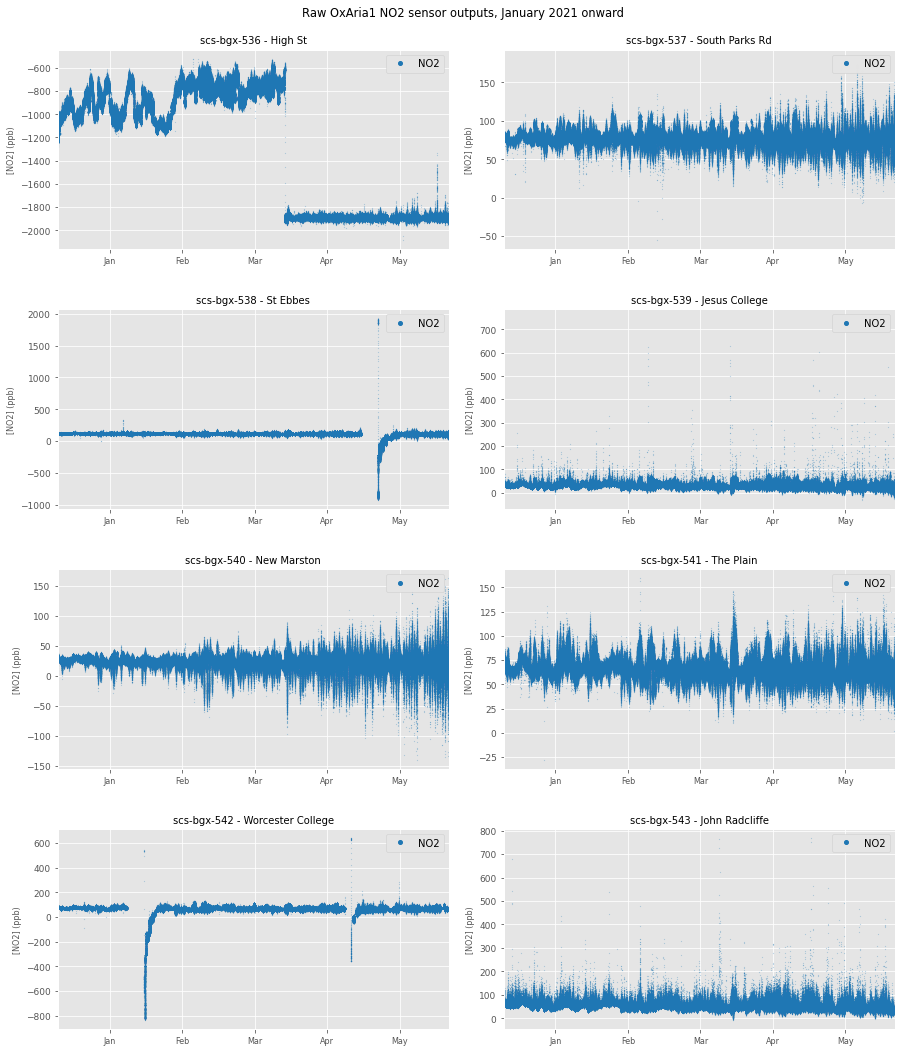

In [4]:
# NO2 ts plot
# -------------
plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime(2021, 6, 1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria1 NO2 sensor outputs, January 2021 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria1_gases.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.no2.cnc', c='tab:blue', linewidth=0.5, marker='o', ms=0.1, ls='', label='NO2', ax=ax, legend=True,
             zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[NO2] (ppb)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper right')

plt.savefig(pngs+'oxaria1_no2_raw_sensor_q12021_ts.png')
plt.show()

for ax in axes_list:
    ax.remove()

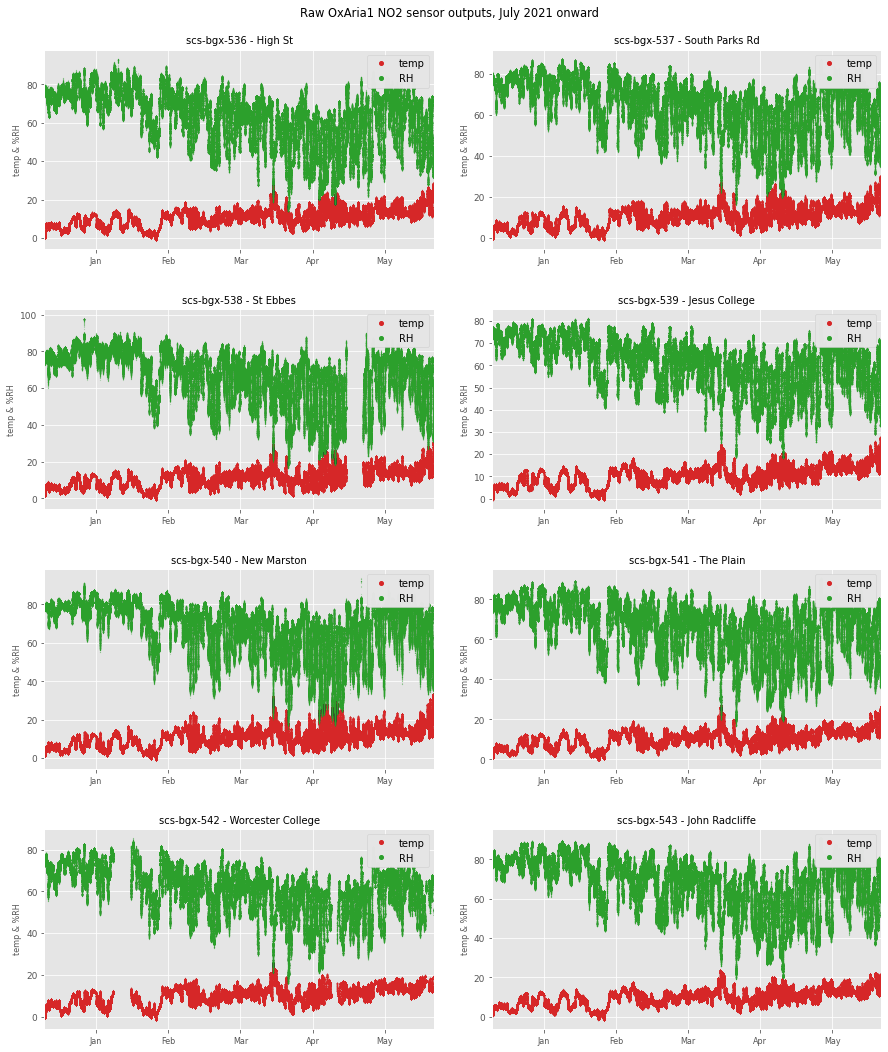

In [5]:
# Temp & RH ts plot
#-------------------
plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2021,1,1)
end_date=dt.datetime(2021,6,1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, sharey=False, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria1 NO2 sensor outputs, July 2021 onward', fontsize=11.5, y=0.91)

for tag, dat in oxaria1_gases.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.sht.tmp', c='tab:red',linewidth=0.5, marker='o', ms=0.1, ls='', label='temp', ax=ax, \
             legend=True,zorder=1)
    dat.plot(y='val.sht.hmd', c='tab:green',linewidth=0.5, marker='o', ms=0.1, ls='', label='RH', ax=ax, \
             legend=True,zorder=1)    
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
        )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('temp & %RH', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.15, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper right') 
    
plt.savefig(pngs+'oxaria1_trh_raw_sensor_q12021_ts.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()


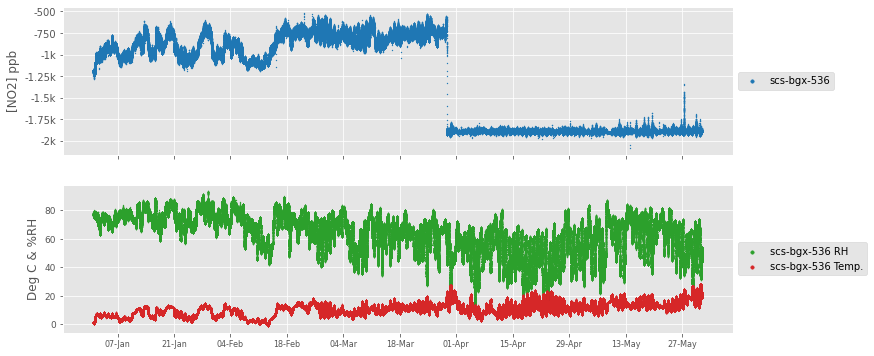

In [6]:
# Individual plot for High St which is not behaving well
#--------------------------------------------------------
plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%d-%b')

data = oxaria1_gases.query('tag == "scs-bgx-536"').reset_index()

def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d}{suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    #print(val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d}{suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf)+"}{suffix}"
                return tx.format(val=val, suffix=suffix[i])
    return y

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))
ax1.scatter(x='rec',y='val.no2.cnc',data=data,marker='.',s=3,label='scs-bgx-536',c='tab:blue');
#ax1.scatter(x='rec',y='no2_ppb',data=highst,marker='.',s=4,label='Reference method',c='dimgrey');
ax2.scatter(x='rec',y='val.sht.hmd',data=data,marker='.',s=3,label='scs-bgx-536 RH',c='tab:green');
ax2.scatter(x='rec',y='val.sht.tmp',data=data,marker='.',s=3,label='scs-bgx-536 Temp.',c='tab:red');

ax2.tick_params(
    axis='x',
    which='major',
    labelrotation=0,
    labelsize=8
    )
ax2.tick_params(axis='y', labelsize=9)
ax2.tick_params(axis='x', which='minor', length=0)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(14))
ax2.xaxis.set_major_formatter(myFmt)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.setp(ax2.xaxis.get_majorticklabels(), ha='center')
ax1.set_ylabel('[NO2] ppb')
ax2.set_ylabel('Deg C & %RH')

ax1.legend(markerscale=4, frameon=True, framealpha=0.99, loc='center left', bbox_to_anchor=(1, 0.5)); 
ax2.legend(markerscale=4, frameon=True, framealpha=0.99, loc='center left', bbox_to_anchor=(1, 0.5));

plt.savefig(pngs+'highst_no2_raw_sensor_q12021_ts.png');
plt.show()  ;  
    

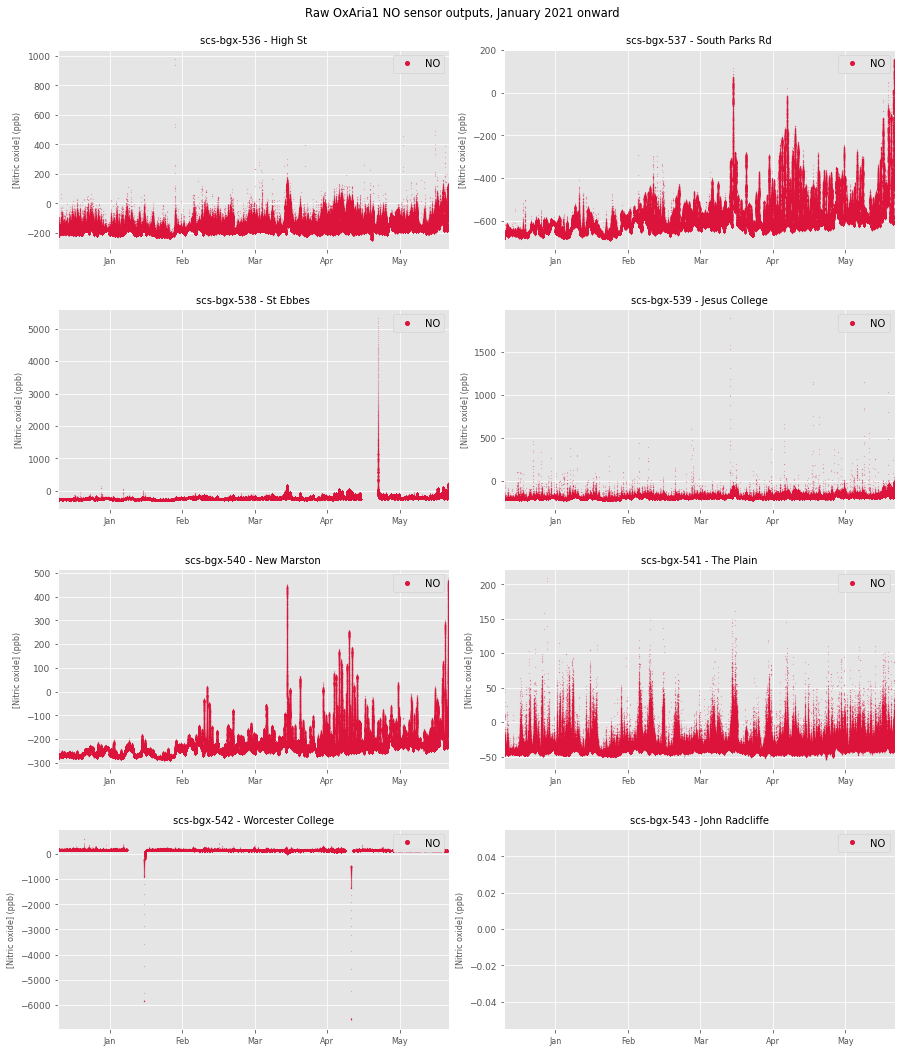

In [7]:
# NO ts plot
# ------------
plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime(2021, 6, 1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria1 NO sensor outputs, January 2021 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria1_gases.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.no.cnc', c='crimson', linewidth=0.5, marker='o', ms=0.1, ls='', label='NO', ax=ax, legend=True,
             zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[Nitric oxide] (ppb)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper right')

plt.savefig(pngs+'oxaria1_no_raw_sensor_q12021_ts.png')
plt.show()

for ax in axes_list:
    ax.remove()

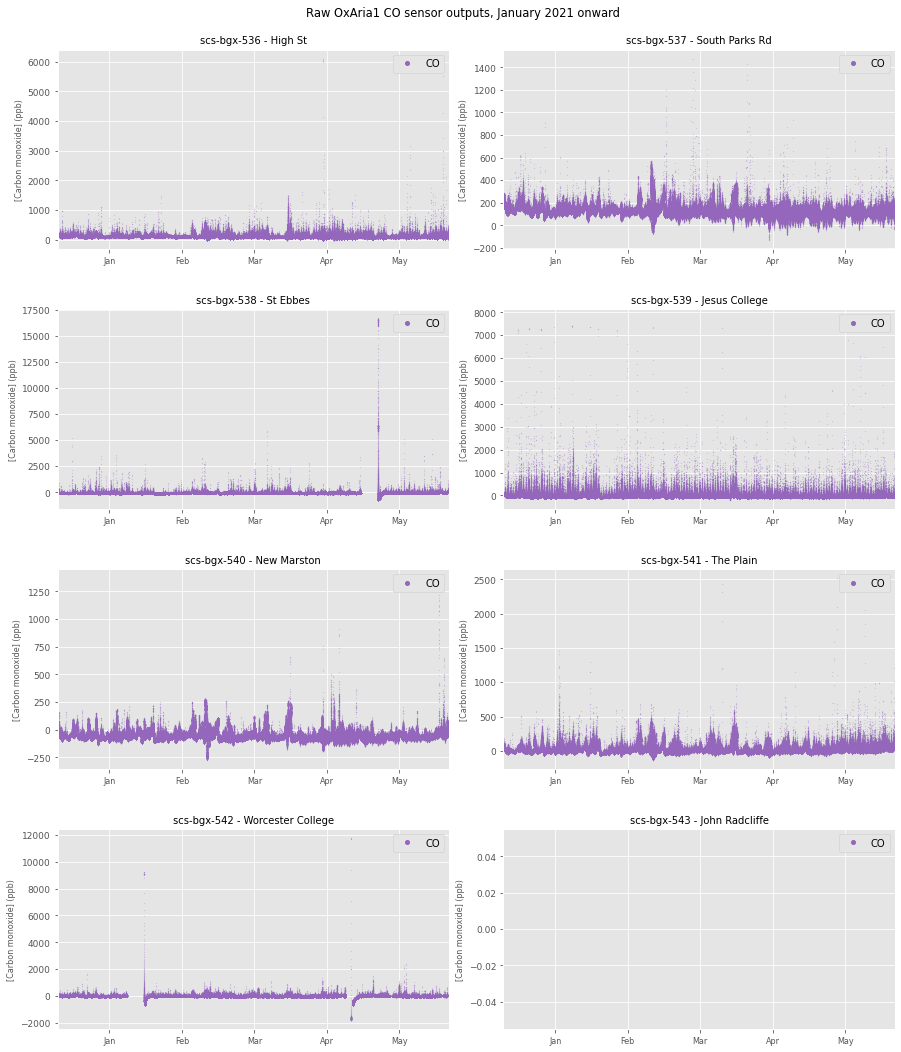

In [8]:
# CO ts plot
# ------------
plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime(2021, 6, 1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria1 CO sensor outputs, January 2021 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria1_gases.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.co.cnc', c='tab:purple', linewidth=0.5, marker='o', ms=0.1, ls='', label='CO', ax=ax, legend=True,
             zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[Carbon monoxide] (ppb)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper right')

plt.savefig(pngs+'oxaria1_co_raw_sensor_q12021_ts.png')
plt.show()

for ax in axes_list:
    ax.remove()

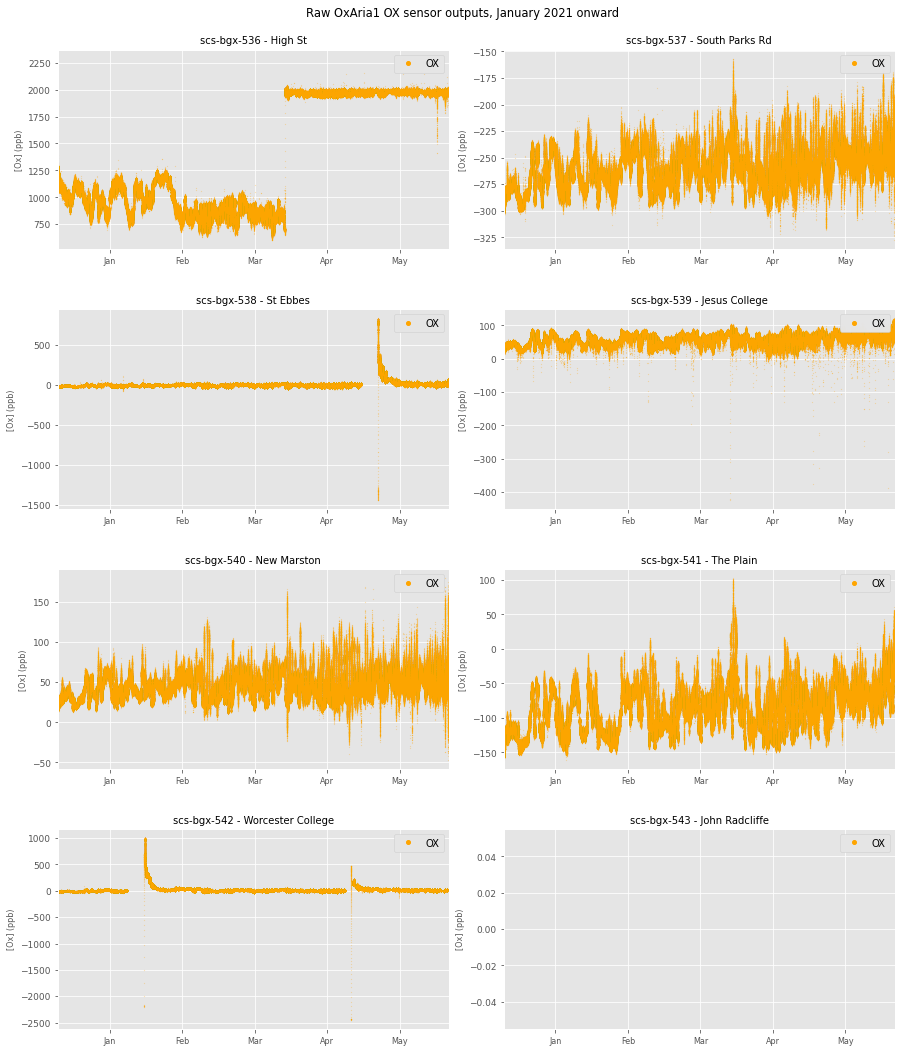

In [9]:
# OX ts plot
#------------
plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2021,1,1)
end_date=dt.datetime(2021,6,1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, sharey=False, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria1 OX sensor outputs, January 2021 onward', fontsize=11.5, y=0.91)

for tag, dat in oxaria1_gases.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.ox.cnc', c='orange',linewidth=0.5, marker='o', ms=0.1, ls='', label='OX', ax=ax, legend=True, \
            zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
        )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[Ox] (ppb)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper right')

plt.savefig(pngs+'oxaria1_ox_raw_sensor_q12021_ts.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()
